In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os, sys
path = os.getcwd()
while not path.endswith('research'):    
    path = os.path.abspath(os.path.join(path, '../'))
sys.path.append(path)

***

In [3]:
import sys
sys.path.append(r'C:\git\smartdata')

import smartdata
from smartdata.utils.common import print_attributes as pa
from smartdata.utils.dframe import display_full_df as ddff
from smartdata.utils.common import to_namedtuple
from smartdata.utils.file import read_from_json, create_file_name
from smartdata import SmartData

In [4]:
import logging
mpl_logger = logging.getLogger('matplotlib')
mpl_logger.setLevel(logging.WARNING)

In [5]:
from datetime import datetime, date
import pandas as pd
import json
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import time

In [6]:
from gmt.fom.gas.shared.utils.common import *
from gmt.fom.gas.shared.utils.dframe import *

In [7]:
from gmt.fom.gas.shared.models.stpb.data.mongo import MongoAdapter

In [8]:
figsize=(8*1.6, 8)

# Data

In [9]:
path = r"\\trading1\Common\gasmodels\short_term_power_burn\data\UK\covariates\Prices\dark_spread_eur_actuals.csv"

In [10]:
df = pd.read_csv(path, header=None)

In [11]:
df.head()

0                        1         2
0  spr_Synth_Dark_UK_DB.EUR  2016-01-03 00:00:00.000 -0.044293
1  spr_Synth_Dark_UK_DB.EUR  2016-01-04 00:00:00.000  2.582538
2  spr_Synth_Dark_UK_DB.EUR  2016-01-05 00:00:00.000  2.552673
3  spr_Synth_Dark_UK_DB.EUR  2016-01-06 00:00:00.000  2.064360
4  spr_Synth_Dark_UK_DB.EUR  2016-01-07 00:00:00.000  4.277249

In [12]:
columns = ['curve_name', 'point_date', 'value']
df.columns = columns

In [13]:
df = to_pd_todatetime(df, 'point_date', utc=False)

In [14]:
df.index = pd.DatetimeIndex(df.set_index('point_date').index)

In [15]:
df = df.resample('1D').sum()

In [16]:
df.index.freq

<Day>

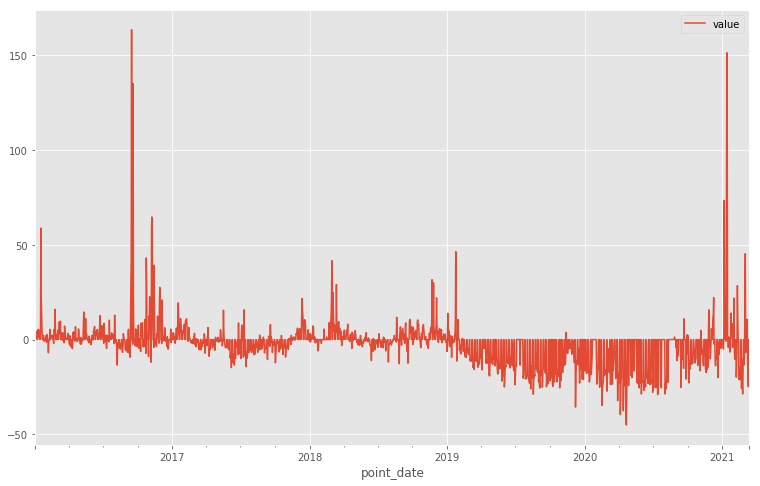

In [17]:
df.plot(figsize=figsize)

## Putting into Mongo

In [18]:
myData = MongoAdapter()

myData.mongo.choose_db(myData.GAS_MODELS_DB)

2021-04-20 13:33:15,721: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\data_sources\mongo.py: 25: DEBUG: Connected successfully.


In [19]:
collection = myData.STPB_COVARIATES_DARK_SPREAD
if collection not in myData.mongo.db.list_collection_names():
    myData.mongo.db.create_collection(name=collection)
    myData.mongo.choose_collection(collection)
else:
    myData.mongo.choose_collection(collection)
    myData.mongo.clear_collection()

In [20]:
time.sleep(5) #<---we need time to clean MongoDB collections

myData.mongo.pandas_to_mongo(df.reset_index())

2021-04-20 13:33:23,340: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\data_sources\mongo.py: 100: DEBUG: Saving 1898 rows to MongoDb.


***

***

# Retrieving

In [21]:
myData = MongoAdapter()

2021-04-20 13:33:28,252: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\data_sources\mongo.py: 25: DEBUG: Connected successfully.


In [22]:
df = myData.load_covariates_dark_spread()

2021-04-20 13:33:29,693: c:\git\gmt-fom-gas-research\gmt\fom\gas\shared\models\stpb\stpb.py: 82: INFO: Retrieving....


In [23]:
df.head()

value
point_date          
2016-01-03 -0.044293
2016-01-04  2.582538
2016-01-05  2.552673
2016-01-06  2.064360
2016-01-07  4.277249